# ChestX-ray8 Dataset

Distribución del dataset:

- No Finding                      60361
- Infiltration                     9547
- Atelectasis                      4215
- Effusion                         3955
- Nodule                           2705
- Pneumothorax                     2194
- Mass                             2139
- Effusion|Infiltration            1603
- Atelectasis|Infiltration         1350
- Consolidation                    1310
- Atelectasis|Effusion             1165
- Pleural_Thickening               1126
- Cardiomegaly                     1093
- Emphysema                         892
- Infiltration|Nodule               829
- Atelectasis|Effusion|Infiltration 737
- Fibrosis                          727
- Edema                             628
- Cardiomegaly|Effusion             484
- Consolidation|Infiltration        441
- Infiltration|Mass                 420
- Effusion|Pneumothorax             403
- Effusion|Mass                     402
- Atelectasis|Consolidation         398
- Mass|Nodule                       394
- Edema|Infiltration                392
- Infiltration|Pneumothorax         345
- Consolidation|Effusion            337
- Emphysema|Pneumothorax            337
- Pneumonia                         322

Atributos 

- Índice Imagen
- Follow-up
- ID paciente
- Edad
- Posición
- Imagen Ancho y Alto


In [83]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Obtener los nombres de la lista de elementos

In [84]:
direccion_dataset = "/media/josejacomeb/Datos1/DatasetsMédicos/ChestX-ray8/" #Poner la dirección del dataset aquí
nombre_archivo_atributos = "Data_Entry_2017_v2020.csv"
ruta_archivo_atributos= os.path.join(direccion_dataset, nombre_archivo_atributos)
ruta_cxr_png = os.path.join(direccion_dataset, "images/")
extension_cxr = "png"
extension_cr = "txt" #Extension Clinical Reading
lista_elementos_dataset_descargados = os.listdir(ruta_cxr_png) # Listar los elementos disponibles del dataset
dataset_datos = pd.read_csv(ruta_archivo_atributos) #Cargar el CSV



In [85]:
#Función para graficar los datasets
def graficar_dataset(dataset, tamano_x = 8, tamano_y = 10, columnas = 3, filas = 3):
    figure = plt.figure(figsize=(tamano_x, tamano_y))
    cols, rows = columnas, filas
    total_datos = len(dataset["Image Index"])
    for i in range(1, cols * rows + 1):
        sample_idx = int(random.random()*total_datos)
        img = mpimg.imread(os.path.join(ruta_cxr_png, dataset.iloc[sample_idx]["Image Index"]))
        condicion = dataset.iloc[sample_idx]["Finding Labels"]
        condicion = condicion.replace("|","\n")
        genero = dataset.iloc[sample_idx]["Patient Gender"]
        proyeccion = dataset.iloc[sample_idx]["View Position"]
        if genero == "M":
            genero = "Male"
        else:
            genero = "Female"
        label = "{} {}\n {}\n Proyección: {}".format(genero, int(dataset.iloc[sample_idx]["Patient Age"]), condicion, proyeccion)
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    return plt

## Característica de los datos
### Descripción 

In [86]:
dataset_datos.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.626365,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.602680,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,0.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,34.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


### Cinco primeros datos

In [87]:
dataset_datos.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


### Distribución por Género

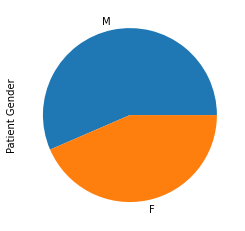

In [88]:
valores_genero = dataset_datos["Patient Gender"].value_counts()
valores_genero = valores_genero.plot.pie()

### Distibución por Proyección

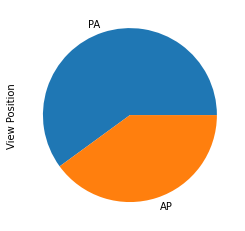

In [89]:
distribucion_proyeccion = dataset_datos["View Position"].value_counts()
distribucion_proyeccion = distribucion_proyeccion.plot.pie()

### Histograma por enfermedad

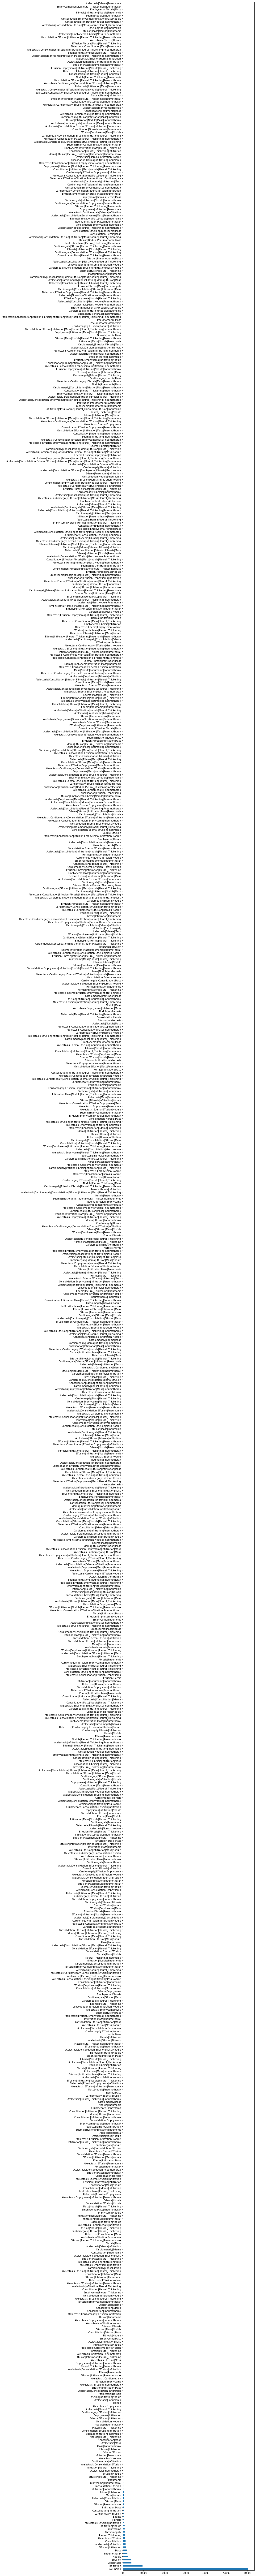

In [79]:
series_enfermedad= dataset_datos["Finding Labels"].value_counts()
matplot_condicion = series_enfermedad.plot.barh(figsize=(10,200))

### Distribución por Edad

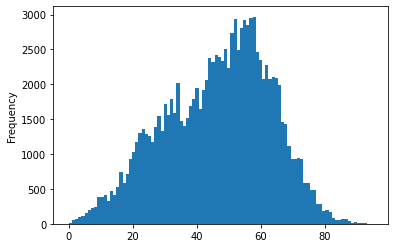

In [90]:
bins_age = dataset_datos["Patient Age"].value_counts().count() 
ax = dataset_datos['Patient Age'].plot.hist(bins=bins_age)

## Visualizar todos los datos
### Limitar el dataset hasta descargar todos el dataset

In [91]:
#Obtengo los indices de las imagenes que coinciden con los nombres de la lista de elementos descargados
idxs_imagenes_disponibles = dataset_datos["Image Index"].isin(lista_elementos_dataset_descargados) 
dataset_datos_disponibles = dataset_datos[idxs_imagenes_disponibles]

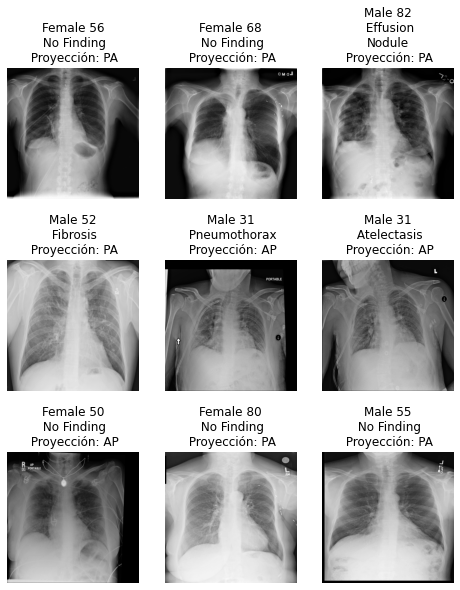

In [92]:
plt = graficar_dataset(dataset_datos_disponibles)
plt.show()

### Filtrar por Edad
### Jóvenes


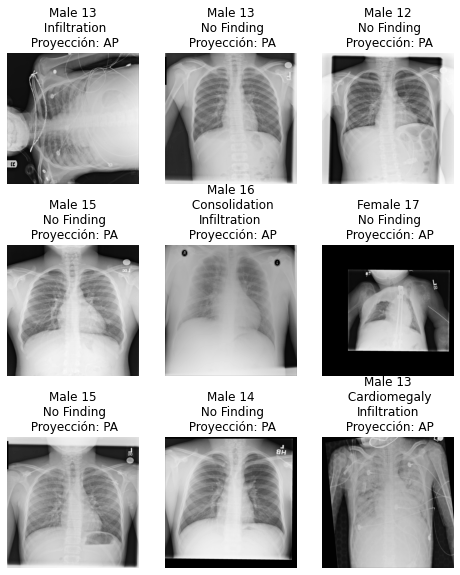

In [93]:
dataset_jovenes = dataset_datos_disponibles[dataset_datos_disponibles["Patient Age"] < 18.0]
plt = graficar_dataset(dataset_jovenes)
plt.show()


### Adultos 

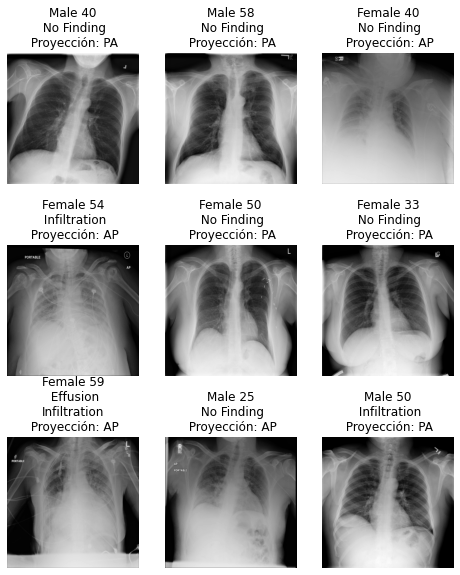

In [94]:
dataset_adultos = dataset_datos_disponibles[(dataset_datos_disponibles["Patient Age"] >= 18.0) & (dataset_datos_disponibles["Patient Age"] < 60.0)]
plt = graficar_dataset(dataset_adultos)
plt.show()

### Adultos Mayores

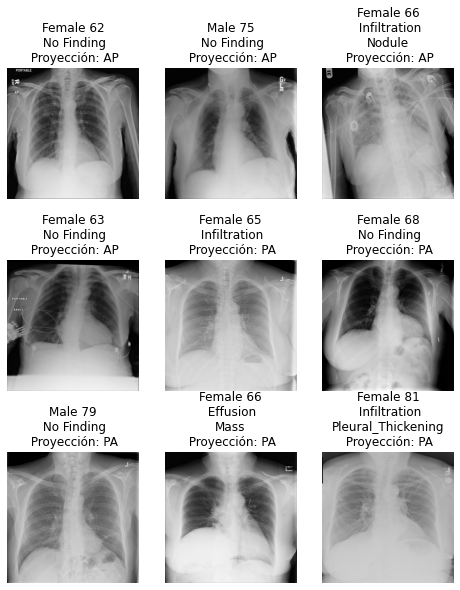

In [95]:
dataset_adultos_mayores = dataset_datos_disponibles[(dataset_datos_disponibles["Patient Age"] >= 60.0)]
plt = graficar_dataset(dataset_adultos_mayores)
plt.show()

### Filtrar por Condición
### Normal

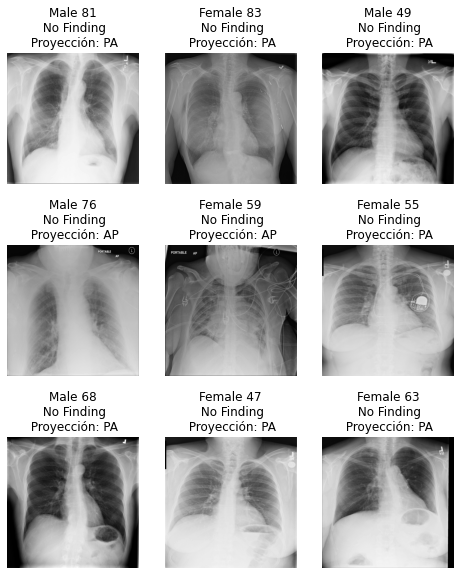

In [96]:
dataset_normal = dataset_datos_disponibles[dataset_datos_disponibles["Finding Labels"] == "No Finding"]
plt = graficar_dataset(dataset_normal)
plt.show()

### Con Neumonia

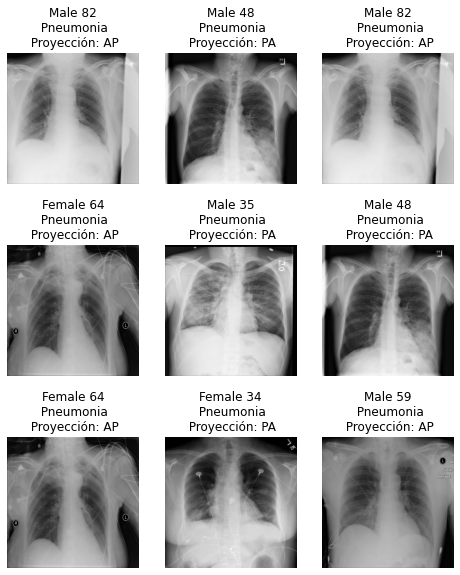

In [97]:
dataset_enfermedad = dataset_datos_disponibles[dataset_datos_disponibles["Finding Labels"] == "Pneumonia"]
plt = graficar_dataset(dataset_enfermedad)
plt.show()

## Filtrar por Proyección
### Posterior-Anterior(PA)

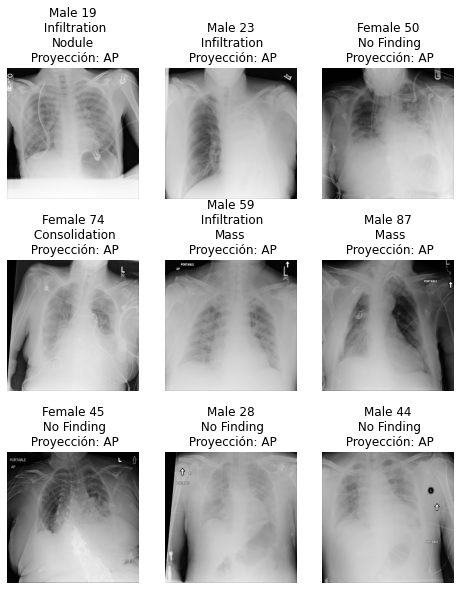

In [98]:
dataset_ap = dataset_datos_disponibles[dataset_datos_disponibles["View Position"] == "AP"]
plt = graficar_dataset(dataset_ap)
plt.show()

### Anterior-Posterior(AP)

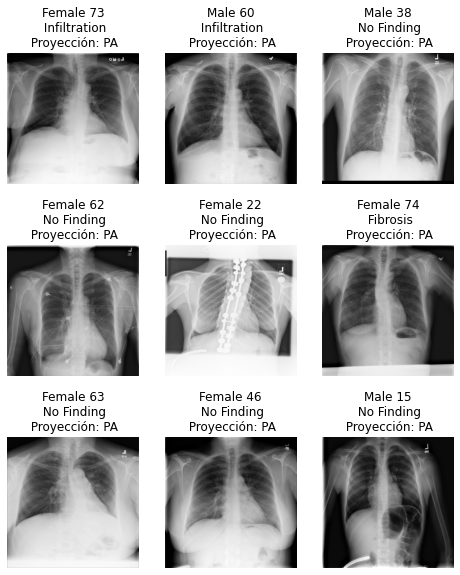

In [99]:
dataset_pa = dataset_datos_disponibles[dataset_datos_disponibles["View Position"] == "PA"]
plt = graficar_dataset(dataset_pa)
plt.show()